#### Use the housing and yacht dataset to estimate the regression weights using normal equations. Contrast the performance (measured 

#### through RMSE) to the results obtained using the gradient descent algorithm, based on a ten-fold cross validation scheme. In this 

#### problem you will calculate the analytical solution that we obtained through Normal equations to learn your weight vector, and contrast 

#### the performance (training and test RMSE) for the same fold with your gradient-descent based implementation for problem-1.

Housing dataset
Linear Regression, Overall Mean Train RMSE: 16.0446236208
Linear Regression, Overall Mean Test RMSE: 16.0095540086
Normal Equation, Overall Mean Train RMSE: 4.66894377438
Normal Equation, Overall Mean Test RMSE: 4.81073635678


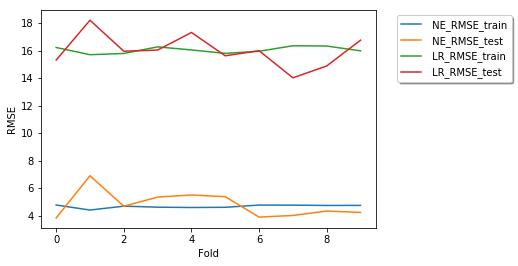

Yacht dataset
Linear Regression, Overall Mean Train RMSE: 10.4946093805
Linear Regression, Overall Mean Test RMSE: 10.4428970564
Normal Equation, Overall Mean Train RMSE: 8.82543254977
Normal Equation, Overall Mean Test RMSE: 9.00157684378


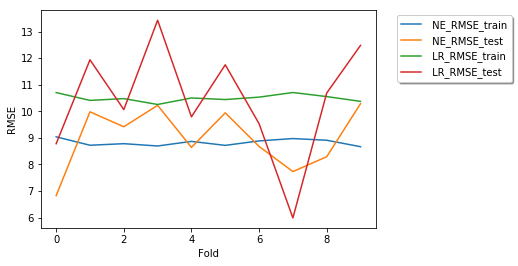

Concrete dataset
Linear Regression, Overall Mean Train RMSE: 21.3900205283
Linear Regression, Overall Mean Test RMSE: 21.378917134
Normal Equation, Overall Mean Train RMSE: 10.3474650652
Normal Equation, Overall Mean Test RMSE: 10.4404828056


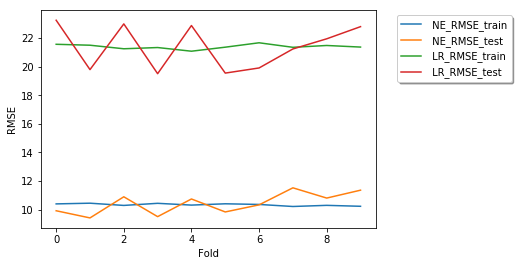

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from csv import reader
from sklearn.preprocessing import StandardScaler
from random import randrange
import operator
%matplotlib inline  

def linear_grad_func_lr(theta, x, y):
    # compute gradient
    grad = np.dot((linear_val_func_lr(theta, x) - y).T, np.c_[np.ones(x.shape[0]), x])
    grad = grad / x.shape[0]
    return grad

def linear_val_func_ne(theta, x):
    # forwarding
    return np.dot(np.c_[np.ones(x.shape[0]), x], theta)

def linear_val_func_lr(theta, x):
    # forwarding
    return np.dot(np.c_[np.ones(x.shape[0]), x], theta.T)

def linear_cost_func_lr(theta, x, y):
    # compute cost (loss)
    y_hat = linear_val_func_lr(theta, x)
    cost = np.mean((y_hat-y)**2)
    return cost

def linear_cost_func_ne(theta, x, y):
    # compute cost (loss)
    y_hat = linear_val_func_ne(theta, x)
    cost = np.mean((y_hat-y)**2)
    return cost

def linear_grad_desc(theta, X_train, Y_train, lr, max_iter, tolerance):
    cost_iter = []
    cost = linear_cost_func_lr(theta, X_train, Y_train)
    RMSE_iter = []
    RMSE_iter.append(np.sqrt(np.sum((linear_val_func_lr(theta, X_train) - Y_train)**2) / Y_train.shape[0]))
    cost_change = 1
    i = 1

    while cost_change > tolerance and i < max_iter:
        pre_cost = cost
        # compute gradient
        grad = linear_grad_func_lr(theta, X_train, Y_train)
        
        # update gradient
        theta = theta - lr * grad

        # compute loss
        cost = linear_cost_func_lr(theta, X_train, Y_train)
        RMSE_iter.append(np.sqrt(np.sum((linear_val_func_lr(theta, X_train) - Y_train)**2) / Y_train.shape[0]))
        cost_change = abs(cost - pre_cost)
        i += 1
    return theta, RMSE_iter

def load_dataset(filename):
    '''Loads an example of market basket transactions from a provided csv file.

    Returns: A list (database) of lists (transactions). Each element of a transaction is
    an item.
    '''
    with open(filename, 'r') as dest_f:
        data_iter = reader(dest_f, delimiter=',', quotechar='"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)

    return data_array

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def linear_regression_normal_equation(dataset, n_folds, lr, max_iter, tolerance):
    # split dataset into training and testing
    dataset_split = cross_validation_split(dataset, n_folds)
    LR_RMSE_train = []
    LR_RMSE_test = []
    NE_RMSE_train = []
    NE_RMSE_test = []
    
    for i in range(n_folds):
        test = np.array(dataset_split[i])
        train = list(dataset_split)
        train.pop(i)
        train = np.array(reduce(operator.add, train))
        
        # Normalize X_Train
        X_train = train[:, :-1]
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        
        #Get the mean and std to normalize the test dataset
        X_test = test[:, :-1]
        X_test = scaler.transform(X_test)
        
        Y_train = train[:, -1]
        Y_test = test[:,-1]
        
        Y_train = Y_train[:, None]
        Y_test = Y_test[:, None]

        # Linear regression
        #  Initialize the weights for the gradient descent algorithm to all zeros
        #theta = np.zeros((1, X_train.shape[1] + 1))
        theta = np.random.rand(1, X_train.shape[1] + 1)
        fitted_theta_lr, _ = linear_grad_desc(theta, X_train, Y_train, lr, max_iter, tolerance)
        fitted_theta_ne = normal_equation(X_train, Y_train)
        
        LR_RMSE_test.append(np.sqrt(np.sum((linear_val_func_lr(fitted_theta_lr, X_test) - Y_test)**2) / Y_test.shape[0]))
        LR_RMSE_train.append(np.sqrt(np.sum((linear_val_func_lr(fitted_theta_lr, X_train) - Y_train)**2) / Y_train.shape[0]))
        
        NE_RMSE_test.append(np.sqrt(np.sum((linear_val_func_ne(fitted_theta_ne, X_test) - Y_test)**2) / Y_test.shape[0]))
        NE_RMSE_train.append(np.sqrt(np.sum((linear_val_func_ne(fitted_theta_ne, X_train) - Y_train)**2) / Y_train.shape[0]))
        
    print('Linear Regression, Overall Mean Train RMSE: {}'.format(np.sum(LR_RMSE_train)*1./len(LR_RMSE_train)))
    print('Linear Regression, Overall Mean Test RMSE: {}'.format(np.sum(LR_RMSE_test)*1. / len(LR_RMSE_test)))
    print('Normal Equation, Overall Mean Train RMSE: {}'.format(np.sum(NE_RMSE_train)*1./len(NE_RMSE_train)))
    print('Normal Equation, Overall Mean Test RMSE: {}'.format(np.sum(NE_RMSE_test)*1. / len(NE_RMSE_test)))
#     print('Overall Mean Train SSE: {}'.format(np.sum(SSE_train)*1./len(SSE_train)))
#     print('Overall Mean Test SSE: {}'.format(np.sum(SSE_test)*1. / len(SSE_test)))
#     print('std of train SSE: {}'.format(np.std(np.array(SSE_train), axis=0)))
#     print('std of test SSE: {}'.format(np.std(np.array(SSE_test), axis=0)))
    return LR_RMSE_train, LR_RMSE_test, NE_RMSE_train, NE_RMSE_test
    
def normal_equation(X, y):
    # add bias to x
    X_b = np.c_[np.ones(X.shape[0]), X]
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

def normal_equation_eval(dataset, n_folds):
    dataset_split = cross_validation_split(dataset, n_folds)
    RMSE_train = []
    RMSE_test = []
    SSE_train = []
    SSE_test = []
    
    for i in range(n_folds):
        test = np.array(dataset_split[i])
        train = list(dataset_split)
        train.pop(i)
        train = np.array(reduce(operator.add, train))
        
        # Normalize X_Train
        X_train = train[:, :-1]
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        
        #Get the mean and std to normalize the test dataset
        X_test = test[:, :-1]
        X_test = scaler.transform(X_test)
        
        Y_train = train[:, -1]
        Y_test = test[:,-1]
        
        Y_train = Y_train[:, None]
        Y_test = Y_test[:, None]

        # Linear regression
        #  Initialize the weights for the gradient descent algorithm to all zeros
        fitted_theta = normal_equation(X_train, Y_train)
        RMSE_test.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_test) - Y_test)**2) / Y_test.shape[0]))
        RMSE_train.append(np.sqrt(np.sum((linear_val_func(fitted_theta, X_train) - Y_train)**2) / Y_train.shape[0]))
        SSE_test.append(np.sum((linear_val_func(fitted_theta, X_test) - Y_test)**2))
        SSE_train.append(np.sum((linear_val_func(fitted_theta, X_train) - Y_train)**2))
        print('Train RMSE: {}'.format(RMSE_train[i]))
        print('Test RMSE: {}'.format(RMSE_test[i]))
    print('Overall Mean Train RMSE: {}'.format(np.sum(RMSE_train)*1./len(RMSE_train)))
    print('Overall Mean Test RMSE: {}'.format(np.sum(RMSE_test)*1. / len(RMSE_test)))
    print('Overall Mean Train SSE: {}'.format(np.sum(SSE_train)*1./len(SSE_train)))
    print('Overall Mean Test SSE: {}'.format(np.sum(SSE_test)*1. / len(SSE_test)))
    print('std of train SSE: {}'.format(np.std(np.array(SSE_train), axis=0)))
    print('std of test SSE: {}'.format(np.std(np.array(SSE_test), axis=0)))
    return RMSE_train, RMSE_test

def main():
    dataset = load_dataset("housing.csv")
    dataset = dataset.astype(float)
    
    print('Housing dataset')
    LR_RMSE_train, LR_RMSE_test, NE_RMSE_train, NE_RMSE_test = linear_regression_normal_equation(dataset, n_folds=10, lr=0.0004, max_iter=1000, tolerance=0.04)
    
    plt.plot(NE_RMSE_train, label = " NE_RMSE_train")
    plt.plot(NE_RMSE_test, label = " NE_RMSE_test")
    plt.plot(LR_RMSE_train, label = " LR_RMSE_train")
    plt.plot(LR_RMSE_test, label = " LR_RMSE_test")
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show()
    
    
    dataset = load_dataset("yachtData.csv")
    dataset = dataset.astype(float)
    print('Yacht dataset')
    LR_RMSE_train, LR_RMSE_test, NE_RMSE_train, NE_RMSE_test = linear_regression_normal_equation(dataset, n_folds=10, lr=0.001, max_iter=1000, tolerance=0.001)
    plt.plot(NE_RMSE_train, label = " NE_RMSE_train")
    plt.plot(NE_RMSE_test, label = " NE_RMSE_test")
    plt.plot(LR_RMSE_train, label = " LR_RMSE_train")
    plt.plot(LR_RMSE_test, label = " LR_RMSE_test")
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show()
    
    dataset = load_dataset("concreteData.csv")
    dataset = dataset.astype(float) 
    print('Concrete dataset')
    LR_RMSE_train, LR_RMSE_test, NE_RMSE_train, NE_RMSE_test = linear_regression_normal_equation(dataset, n_folds=10, lr=0.0007, max_iter=1000, tolerance=0.0001)
    plt.plot(NE_RMSE_train, label = " NE_RMSE_train")
    plt.plot(NE_RMSE_test, label = " NE_RMSE_test")
    plt.plot(LR_RMSE_train, label = " LR_RMSE_train")
    plt.plot(LR_RMSE_test, label = " LR_RMSE_test")
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show()

if __name__ == "__main__":
    main()